In [7]:
## 1.) Using Neural Network Perform the implementation of AND, NAND, OR, and NOR

# Truth Table for AND Gate
and_gate = [(0,0,0),(0,1,0),(1,0,0),(1,1,1)]
# Truth Table for NAND Gate
nand_gate = [(0,0,1),(0,1,1),(1,0,1),(1,1,0)]
# Truth Table for OR Gate
or_gate = [(0,0,0),(0,1,1),(1,0,1),(1,1,1)]
# Truth Table for NOR Gate
nor_gate = [(0,0,1),(0,1,0),(1,0,0),(1,1,0)]

#defining the training function
def train(weights,gate):
    return [ weights[0]*gate[i][0]+weights[1]*gate[i][1] for i in range(len(gate))]

# calculating thresholds
def getthreshold(gate, value):
    l1 = []
    l2 = []
    for i in range(len(gate)):
        if gate[i][2]==0:
            l1.append(value[i])
        else:
            l2.append(value[i])
    
    if abs(max(l1)-min(l2))==1:
        return max(l1)
    else:
        return min(l1)

weights_and =    [1,1]
weights_nand =   [1,1]
weights_or =     [1,1]
weights_nor =    [1,1]

#training the and_gate
vals_and = train(weights_and, and_gate)
vals_nand = train(weights_nand, nand_gate)
vals_or = train(weights_or, or_gate)
vals_nor = train(weights_nor, nor_gate)

values = [vals_and, vals_nand, vals_or, vals_nor]
gates_name = ["AND","NAND","OR","NOR"]
gates = [and_gate, nand_gate, or_gate, nor_gate]
for i in range(4):
    print "Values after computing outputs for " + gates_name[i] + " gate and the corresponding outputs:"
    print values[i]
    print [ gates[i][j][2] for j in range(4)]

    

#Calculating Thresholds for each gate
for i in range(4):
    print "Threshold for " + gates_name[i] + ":"
    print getthreshold(gates[i],values[i])





Values after computing outputs for AND gate and the corresponding outputs:
[0, 1, 1, 2]
[0, 0, 0, 1]
Values after computing outputs for NAND gate and the corresponding outputs:
[0, 1, 1, 2]
[1, 1, 1, 0]
Values after computing outputs for OR gate and the corresponding outputs:
[0, 1, 1, 2]
[0, 1, 1, 1]
Values after computing outputs for NOR gate and the corresponding outputs:
[0, 1, 1, 2]
[1, 0, 0, 0]
Threshold for AND:
1
Threshold for NAND:
2
Threshold for OR:
0
Threshold for NOR:
1


In [3]:
## 2.) Using Neural Network Perform any two class classification Problem
## Classify between 2 letters designed on a 3x3 matrix with classes 1 and -1
## Letters can be I and U

matrix_I = [1,1,1,-1,1,-1,1,1,1]
matrix_U =  [1,-1,1,1,-1,1,1,1,1]
target = [1,-1]
## Initialise the weights and bias as 0
weights_bias = [0] + [ 0 for i in range(9) ]

## Using Hebb's Rule to update weights
## for matrix_I
for i in range(10):
    if i==0:
        ## Update bias
        weights_bias[0]+=target[0]
    else:
        weights_bias[i]+=target[0]*matrix_I[i-1]
print "Bias and Weights after 1st training on I matrix:"
print weights_bias

## for matrix_U
for i in range(10):
    if i==0:
        ##Update bias
        weights_bias[0]+=target[1]
    else:
        weights_bias[i]+=target[1]*matrix_U[i-1]
print "Bias and Weights after 2nd training on U matrix:"
print weights_bias
        

Bias and Weights after 1st training on I matrix:
[1, 1, 1, 1, -1, 1, -1, 1, 1, 1]
Bias and Weights after 2nd training on U matrix:
[0, 0, 2, 0, -2, 2, -2, 0, 0, 0]


In [21]:
## 3.) Using Neural Network Perform any two class classification Problem
## Classify between 2 letters designed on a 3x3 matrix with classes 1 and -1
## Letters can be H and L

matrix_H = [1,-1,1,1,1,1,1,-1,1]
matrix_L =  [1,-1,-1,1,-1,-1,1,1,1]
target = [1,-1]
## Initialise the weights and bias as 0
weights_bias = [0] + [ 0 for i in range(9) ]

## Using Hebb's Rule to update weights
## for matrix_I
for i in range(10):
    if i==0:
        ## Update bias
        weights_bias[0]+=target[0]
    else:
        weights_bias[i]+=target[0]*matrix_H[i-1]
print "Bias and Weights after 1st training on I matrix:"
print weights_bias

## for matrix_U
for i in range(10):
    if i==0:
        ##Update bias
        weights_bias[0]+=target[1]
    else:
        weights_bias[i]+=target[1]*matrix_L[i-1]
print "Bias and Weights after 2nd training on U matrix:"
print weights_bias
        

Bias and Weights after 1st training on I matrix:
[1, 1, -1, 1, 1, 1, 1, 1, -1, 1]
Bias and Weights after 2nd training on U matrix:
[0, 0, 0, 2, 0, 2, 2, 0, -2, 0]


In [36]:
## 4) Using Neural Network Implement Perceptron Learning Algorithm

## Using Perceptron Learning Algorithm for classifying 2 letters in a 3x3 matrix
matrix_I = [1,1,1,-1,1,-1,1,1,1]
matrix_F = [1,1,1,1,1,1,1,-1,-1]

# Initialising weights and biases
weights_bias = [0 for i in range(10)] 

target = [1,-1]

alpha = 0.1   ## learning rate

epochs = int(raw_input("Enter the number of epochs to train:"))

def f(yin):
    if yin>0:
        return 1
    elif yin==0:
        return 0
    else:
        return -1


for ep in range(epochs):
    print "Epoch #"+str(ep+1)+"beginning:"
    yinI = 0
    yinF = 0
    yinI = weights_bias[0]
    
    ## Training on 1st Matrix
    # Calculating yin
    
    for i in range(1,10):
        yinI+=matrix_I[i-1]*weights_bias[i]
    print "yin for I matrix:  ", yin
    
    # Target value 
    y = f(yinI)
    
    if y!= target[0]:
        ## weight updation starts
        weights_bias[0]+=alpha*target[0]
        for i in range(1,10):
            weights_bias[i]+=alpha*target[0]*matrix_I[i-1]
        print "New Calculated Bias and Weights:"
        print weights_bias
    else:
        print "No updation required"
        
    ## Training on 2nd matrix
    # Calculating yin
    yinF = weights_bias[0]
    for i in range(1,10):
        yinF+=matrix_F[i-1]*weights_bias[i]
    print "yin for F matrix: ", yin
    
    ## Target value
    y = f(yinF)
    if y!=target[1]:
        ## weight updation starts
        weights_bias[0]+=alpha*target[0]
        for i in range(1,10):
            weights_bias[i]+=alpha*target[0]*matrix_F[i-1]
        print "New Calculated Bias and Weights:"
        print weights_bias
    else:
        print "No Updation Required"
        
    if f(yinI)==target[0] and f(yinF)==target[1]:
        print "Network Converged Successfully!"

    
    print "Epoch #"+str(ep+1)+" ends:"
    

print "Final Bias and Weights:"
print weights_bias
    
    





Enter the number of epochs to train:1000
Epoch #1beginning:
yin for I matrix:   3.3
New Calculated Bias and Weights:
[0.1, 0.1, 0.1, 0.1, -0.1, 0.1, -0.1, 0.1, 0.1, 0.1]
yin for F matrix:  3.3
New Calculated Bias and Weights:
[0.2, 0.2, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0]
Epoch #1 ends:
Epoch #2beginning:
yin for I matrix:   3.3
No updation required
yin for F matrix:  3.3
New Calculated Bias and Weights:
[0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.1, 0.30000000000000004, 0.1, 0.30000000000000004, -0.1, -0.1]
Epoch #2 ends:
Epoch #3beginning:
yin for I matrix:   3.3
No updation required
yin for F matrix:  3.3
New Calculated Bias and Weights:
[0.4, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.4, -0.2, -0.2]
Epoch #3 ends:
Epoch #4beginning:
yin for I matrix:   3.3
No updation required
yin for F matrix:  3.3
New Calculated Bias and Weights:
[0.5, 0.5, 0.5, 0.5, 0.30000000000000004, 0.5, 0.30000000000000004, 0.5, -0.30000000000000004, -0.30000000000000004]

In [13]:
## 5) Using Neural Network Perform the implementation of XOR and XNOR

## For XOR Gate 

## The Function: f1 = x1(~x2)
f1 = [ (0,0,0), (0,1,0), (1,0,1), (1,1,0) ]
## The Function: f2 = (~x1)x2
f2 = [ (0,0,0), (0,1,1), (1,0,0), (1,1,0) ]
## The Function: f3 = f1+f2
f3 = [ (0,0,0) ,(0,1,1), (1,0,1), (0,0,0)]


## For XNOR Gate
## Function: f4 = x1x2
f4 = [ (0,0,0), (0,1,0), (1,0,0), (1,1,1) ]
## Function: f5 = (~x1)(~x2)
f5 = [ (0,0,1), (0,1,0), (1,0,0), (1,1,0) ]
## Function: f6 = f4 + f5
f6 = [ (0,1,1), (0, 0, 0), (0, 0, 0), (1, 0, 1)]


def train(weights, gate):
    return [ weights[0]*gate[i][0] + weights[1]*gate[i][1] for i in range(len(gate)) ]

## We model the XOR function as a 2 layer neural network
## The first layer is computes function f1, the second layer computes function f2, finally, the output is defined by ORing
## the outputs of the last layer.

def getthreshold(gate, value):
    l1 = []
    l2 = []
    for i in range(len(gate)):
        if gate[i][2]==0:
            l1.append(value[i])
        else:
            l2.append(value[i])
    
    if abs(max(l1)-min(l2))==1:
        return max(l1)
    else:
        return min(l1)
    
weights_f1 = [1,-1]
weights_f2 = [-1,1]
weights_f3 = [1, 1]
weights_f4 = [1, 1]
weights_f5 = [-1,-1]
weights_f6 = [1, 1]


vals_f1 = train(weights_f1, f1)
vals_f2 = train(weights_f2, f2)
vals_f3 = train(weights_f3, f3)
vals_f4 = train(weights_f4, f4)
vals_f5 = train(weights_f5, f5)
vals_f6 = train(weights_f6, f6)

print "----------------Modelling XOR Gate-------------------"
print "Values for f1:", vals_f1
print "Values for f2:", vals_f2
print "Values for f3:", vals_f3

print "Threshold for first layer:", getthreshold(f1, vals_f1)
print "Threshold for second layer:", getthreshold(f2, vals_f2)
print "Threshold for output:", getthreshold(f3, vals_f3)

print "----------------Modelling XNOR Gate--------------------"
print "Values for f4:", vals_f4
print "Values for f5:", vals_f5
print "Values for f6:", vals_f6

print "Threshold for first layer:", getthreshold(f4, vals_f4)
print "Threshold for second layer:", getthreshold(f5, vals_f5)
print "Threshold for output", getthreshold(f6, vals_f6)

----------------Modelling XOR Gate-------------------
Values for f1: [0, -1, 1, 0]
Values for f2: [0, 1, -1, 0]
Values for f3: [0, 1, 1, 0]
Threshold for first layer: 0
Threshold for second layer: 0
Threshold for output: 0
----------------Modelling XNOR Gate--------------------
Values for f4: [0, 1, 1, 2]
Values for f5: [0, -1, -1, -2]
Values for f6: [1, 0, 0, 1]
Threshold for first layer: 1
Threshold for second layer: -1
Threshold for output 0


In [29]:
## 6.) Implement McCulloch-Pits Model of Neural Networks
## Quick Intro to McCulloch-Pitts Model of Neural Network
## The neural network has 'n' input neurons and one output neuron.
## Depending on the sign of the weight, the neuron can act as an excitatory neuron ( which activates the input stimulus )
## or inhibitory neuron, which deactivates the input.
## Let there be 'n' input neurons of which, 'm' are excitatory with weight 'w' (w>0) and 'n-m' inhibitory, with weight 'p' (p<0)
## The output of the first layer, assuming x = (x1, x2, x3, .... xn) is the input vector is

## yin = b + sum(i = 1 to m)xi*w + sum(i=m+1 to n)xi*p

## The final output is given by the activation of the net input to the output neuron,
## i.e. y = f(yin) = { 1  if yin >= threshold; 0 otherwise
## The McCulloch Model uses binary inputs and outputs
class McCullochs:
    
    def __init__(self, excitatory_neurons, inhibitory_neurons, w, p):
        self.excitatory_neurons = excitatory_neurons
        self.inhibitory_neurons = inhibitory_neurons
        self.w = w
        self.p = p
    
    def calc_yin(self, input_vector):
        s1 = self.w*sum(input_vector[:self.excitatory_neurons])
        s2 = self.p*sum(input_vector[self.excitatory_neurons:])
        yin = s1 + s2
        return yin
    
    def calc_y(self,yin, threshold):
        if yin> threshold:
            return 1
        else:
            return 0
        
if __name__ == "__main__":
    
    ## Now, we'll illustrate a problem that can be modelled using the McCulloch Pitt's Model
    ## Consider Modelling the AND Gate, with 2 input neurons and 1 output neuron
    ## The Truth Table is:
    ## x1 x2 y
    ## 0  0  0
    ## 0  1  0
    ## 1  0  0
    ## 1  1  1
    network = McCullochs(2,0,1,0)
    
    ## Now, we'll calculate the, the yin for each input pair
    input_pairs = [(0,0),(0,1),(1,0),(1,1)]
    outputs = [0,0,0,1]
    yins = []
    i = 0
    print "Modelling McCulloch Pitts Neuron"
    print "Input Pair\t Calculated yin\t Target Output"
    for input_pair in input_pairs:
        yins.append(network.calc_yin(input_pair))
        print str(input_pair)+"\t\t "+str(yins[-1])+"\t\t "+str(outputs[i])
        i+=1
        
    ## Now, we'll calculate the threshold for the above function
    gate = [(input_pairs[i][0],input_pairs[i][1],outputs[i]) for i in range(4)]
    threshold = getthreshold(gate, yins)
    print "Threshold for AND gate is:", threshold
    print"Calculated y = f(yin)"
    print "Input Pair\t Calculated yin\t Target Output \t Calculated y = f(yin)"
    for i in range(len(input_pairs)):
        print str(input_pairs[i])+"\t\t "+str(yins[i])+"\t\t "+str(outputs[i])+"\t\t "+str(network.calc_y(yins[i],threshold))
        


Modelling McCulloch Pitts Neuron
Input Pair	 Calculated yin	 Target Output
(0, 0)		 0		 0
(0, 1)		 1		 0
(1, 0)		 1		 0
(1, 1)		 2		 1
Threshold for AND gate is: 1
Calculated y = f(yin)
Input Pair	 Calculated yin	 Target Output 	 Calculated y = f(yin)
(0, 0)		 0		 0		 0
(0, 1)		 1		 0		 0
(1, 0)		 1		 0		 0
(1, 1)		 2		 1		 1


Applying Hebbian Learning Rule to model AND gate
Inputs	   	 Output 	 Weights and bias(initialised to 0)
x1	 x2	 y 	 	 w1	w2	b
1	 1	 1 	 	 1	1	1
1	 -1	 -1 	 	 0	2	0
-1	 1	 -1 	 	 1	1	-1
-1	 -1	 -1 	 	 2	2	-2
Line Plot showing linear separability of AND gate
w1 = 1, w2 = 1, b = 1
-1 1
[-1  0  1] [2 1 0]


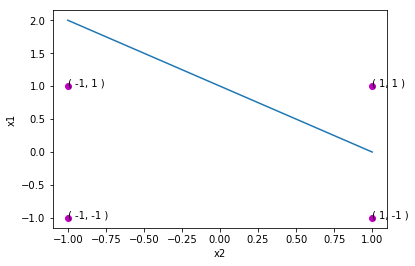

w1 = 0, w2 = 2, b = 0
0 0
[-1  0  1] [0 0 0]


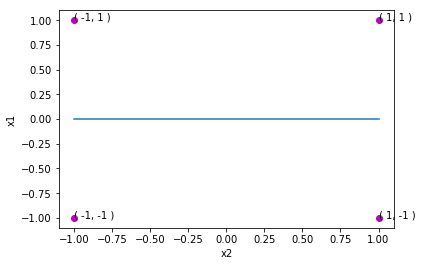

w1 = 1, w2 = 1, b = -1
-1 1
[-1  0  1] [2 1 0]


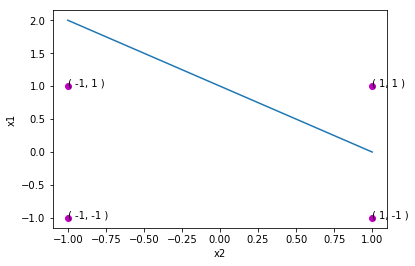

w1 = 2, w2 = 2, b = -2
-1 0
[-1  0  1] [ 1  0 -1]


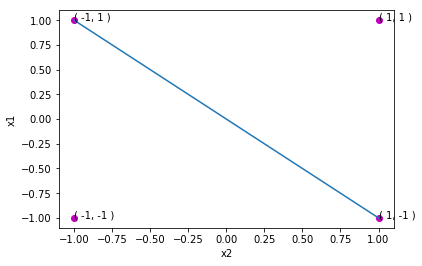

In [142]:
## 7.) Implement Hebb Network

## A Hebb network is a neural network that employs Hebb Learning Rule, which is:
'''
    w_i(new) = w_i(old) + x_i*y
    bias(new) = bias(old)+ y
'''
## Modelling the AND gate again, but this time, we will use Hebbian Lerning rule to finalise weights instead of randomly guessing 
## them
import matplotlib.pyplot as plt
import numpy as np
and_gate_inputs = [ (1,1),(1,-1),(-1,1),(-1,-1) ]
and_gate_outputs = [ 1, -1, -1, -1 ]

w1 = w2 = b = 0

print "Applying Hebbian Learning Rule to model AND gate"
print "Inputs\t   \t Output \t Weights and bias(initialised to 0)"
print "x1\t x2\t y \t \t w1\tw2\tb"

weights_bias = []
for i in range(4):
    x1 = and_gate_inputs[i][0]
    x2 = and_gate_inputs[i][1]
    y = and_gate_outputs[i]
    w1 = w1 + x1*y
    w2 = w2 + x2*y
    b = b + y
    weights_bias.append((w1, w2, b))
    print "{}\t {}\t {} \t \t {}\t{}\t{}".format(x1,x2,y,w1,w2,b)
    
## Now, showing plots of each weight value using linear separbility concept
print "Line Plot showing linear separability of AND gate"
for (w1, w2, b) in weights_bias:
    print "w1 = {}, w2 = {}, b = {}".format(w1, w2, b)
    ## plotting the 4 input pairs
    x = [1,1,-1,-1]
    y = [1,-1,1,-1]
    plt.plot(x,y,'mo')
    for a,b in zip(x,y):
        plt.text(a,b,"( {}, {} )".format(a,b))
    X = np.arange(-1,2)
    m = -w1/w2
    c = -b/w2
    print m,c
    Y = m*X + c
    print X,Y
    plt.plot(X,Y)
    plt.xlabel('x2')
    plt.ylabel('x1')
    plt.show()
    
        
    
    
    




In [2]:
## 8.) Implement Adaline Network
## An Adaline is a Neural Network that has a single Linear Activation Unit
## The network architecture is like McCulloch Pitts Model with the difference of the learning rule
## The Adaline employs the Widrow-Hoff rule for learning
'''
    w_i(new) = w_i(old) + alpha*(t - yin)x_i
    b_new = b_old + alpha*(t - yin)
    
    e = (t - yin)^2
'''
## The Network is trained until e is minimised
## The Adaline network uses bipolar inputs and outputs

import numpy as np

class Adaline:
    def __init__(self, input_neurons, alpha):
        self.input_neurons = input_neurons
        self.alpha = alpha
        
    def initialize(self):
        self.weights = np.array([0.1]*self.input_neurons)
        self.bias = 0.1
    
    def calc_yin(self, input_vector):
        yin = self.bias + sum(input_vector*self.weights)
        return yin
    def calc_weights(self, input_vector, target, yin):
        self.weights = self.weights + self.alpha*(target - yin)*input_vector
        self.bias = self.bias + self.alpha*(target - yin)
        
        return self.weights, self.bias
    def calc_error(self, target, yin):
        return (target - yin)**2
    
if __name__ == "__main__":
    
    net = Adaline(2,0.1)
    
    input_vectors = np.array( [ [-1,-1],[-1,1],[1,-1],[1,1] ])
    targets = np.array([-1, -1, -1, 1])
    
    print "------------Using Adaline Network to Model AND Gate----------------"
    
    epochs = int(raw_input("Enter the number of epochs:"))
    net.initialize()
    min_error = float("inf")
    w1, w2, b = 0, 0, 0   ## the final weights and biases that we'll find
    for _ in range(epochs):
        print "----------------------------------------------------------------"
        print "Epoch: ",str(_+1)
        
        print "x1\tx2\tt\tbias\t yin\t w1\t w2\t Error"
        
        avg_error = 0.00
        for i in range(len(input_vectors)):
            yin = net.calc_yin(input_vectors[i])
            weights, bias = net.calc_weights(input_vectors[i], targets[i], yin)
            error = net.calc_error(targets[i], yin)
            print str(input_vectors[i][0])+"\t"+str(input_vectors[i][1])+"\t"+str(targets[i])+"\t"+str(bias)+"\t"+str(yin)+"\t"+str(weights[0])+"\t"+str(weights[1])+"\t"+str(error)
            avg_error+=error
            if error < min_error:
                w1, w2, b  = weights[0], weights[1], bias
                min_error = error
        
        print "Average Error: {}".format(avg_error/4.00)
        print "---------------------------------------------------------------"
    
    print "Minimum Error", min_error
    print "Final Weights and Bias"
    print "w1 = {}, w2 = {}, bias = {}".format(w1, w2, b)
        
    
        

------------Using Adaline Network to Model AND Gate----------------
Enter the number of epochs:100
----------------------------------------------------------------
Epoch:  1
x1	x2	t	bias	 yin	 w1	 w2	 Error
-1	-1	-1	0.01	-0.1	0.19	0.19	0.81
-1	1	-1	-0.091	0.01	0.291	0.089	1.0201
1	-1	-1	-0.2021	0.111	0.1799	0.2001	1.234321
1	1	1	-0.11989	0.1779	0.26211	0.28231	0.67584841
Average Error: 0.9350673525
---------------------------------------------------------------
----------------------------------------------------------------
Epoch:  2
x1	x2	t	bias	 yin	 w1	 w2	 Error
-1	-1	-1	-0.153459	-0.66431	0.295679	0.315879	0.1126877761
-1	1	-1	-0.2401331	-0.133259	0.3823531	0.2292049	0.751239961081
1	-1	-1	-0.33143461	-0.0869849	0.29105159	0.32050641	0.833596572828
1	1	1	-0.259446949	0.28012339	0.363039251	0.392494071	0.518222333625
Average Error: 0.553936660909
---------------------------------------------------------------
----------------------------------------------------------------
Epoch: 

In [51]:
## 9.) Implement Backpropagation in Neural Networks
## Backpropagation is a novel technique of upadating the weights and biases in a multilayer feed forward network, 
## where the activation function is differentiable
'''
    Architecture of Backpropagation Network (BPN)
    It has 2 layers:
    1.) Input Layer denoted by X - has 'n' neurons, which take input from the application - hence Xi means, ith input neuron
    2.) Hidden Layer denoted by Z - has 'p' neurons, which take input from the input layer - hence Zj means, the jth hidden neuron
    3.) Output Layer denotes by Y - has 'm' neurons, which take input from the hidden layer - hence Yk means, the kth output neuron
    
    The BPN architecture is a fully connected feedforward architecture, meaning, all neurons from the previous layer
    are connected to all the neurons of the next layer
    
    Some more terminology and symbology:-
    The hidden layer and the Output layer, besides the neurons, have a bias neuron as well, whose input is always one
    The weights from Input Layer to Hidden Layer are symbolised by 'v'
    and 
        vij - means the weight of the connection from ith input neuron to jth hidden neuron
    The weights from the Hidden Layer to the Output Layer are symbolised by 'w'
    and
        wjk - means the weight of the connection from the jth hidden neuron to the kth output neuron
    
    The functioning of the BPN is summarised in 3 Phases:
        1.) Feed Forward Phase
        2.) Back Propagation of the Error 
        3.) Weight and Bias Updation
    
    1.) Feed Forward Phase
    The net input for jth neuron in the hidden layer is given by:
        Zinj = v0j + sum(i =1 to n)Xi*Vij
    and the output the jth neuron will give would be the activation of the input, or
        Zj = f(Zinj)
    where f(x) = 1/( 1 + exp(-x)), the sigmoidal function
    
    Similarly, the net input for kth neuron in the output layer is given by:
        Yink = w0k + sum(j = 1 to p)Zj*wjk
    and the output of the kth neuron is likewise, 
        Yk = f(Yink)
    
    2.) The Backpropagation Phase
    
    Each output neuron has a corresponding target value tk and the output value the neuron gives Yk
    Obviously, we would want Yk to be as close as possible to tk, but making sure that the network doesn't overfits
    
    We define del-k to be the error associated with kth output neuron
        del-k = (tk - Yk)f'(Yink)
    We know that 
        f(x) = 1/( 1 + exp(-x))
        f'(x) = [-1/( 1 + exp(-x))^2][-exp(-x)] = exp(-x)/[1+exp(-x)]^2 = f(x)[exp(x)/[1+exp(-x)]] = f(x)[1-f(x)]
        hence, 
        f'(x) = f(x)[1-f(x)]
    As f(Yink) = Yk
    Or, 
    
        del-k = (tk - Yk)Yk(1 - Yk)
    Based upon this error, the change in the weight connecting Hidden and Output Layers , i.e. del-wjk is given by:
    
        del-wjk = alpha*del-k*Zj
    Similary, the change in bias is
        del-w0k = alpha*del-k
    
    Now, we will calculate the error associated with each Hidden Layer Neuron
    We, define, del-in-j as the backward input error to jth Hidden Neuron
        del-in-j = sum(k=1 to m)del-k*wjk
    As we did in feed forward phase, the output error propagated by jth Hidden Neuron, del-j is then:
        del-j = del-in-j*f'(Zinj)
    We know that f(Zinj) = Zj
    So,
        del-j = del-in-j*Zj[1 - Zj]
    Finally, we calculate the changes associated with the weights connecting Input and Hidden Layer
        del-vij = alpha*del-j*Xi
    and
        del-v0j = alpha*del-j
    
    3.) Weights and Bias Updation 
        We simply update the weights and bias
        vij = vij + del-vij
        v0j = v0j + del-v0j
        and
        wjk = wjk + del-wjk
        w0k = w0k + dek-w0k
    
    The running of all the 3 phases once, makes an epoch.
    In practice, we train the network till some predetermined epochs or till tk!=yk
'''
import numpy as np
import random
import math
## Let's Begin Now
class BPN:
    V = []
    W = []
    V0 = []
    W0 = []
    Zin = []
    Z = []
    Yin = []
    Y = []
    DelK = []
    DelW = []
    DelW0 = []
    DelinJ = []
    DelV = []
    DelV0 = []
    DelJ = []
    alpha = random.random()  # the learning rate
    def __init__(self, n, p, m):
        self.n = n
        self.p = p
        self.m = m
        # initialising the weights and biases
        self.V = self.DelV = np.array([ [ random.random() for _ in range(self.p)] for _ in range(self.n) ])
        self.W = self.DelW = np.array([ [ random.random() for _ in range(self.m)] for _ in range(self.p) ])
        self.V0 = self.DelV0 = np.array([ random.random() for _ in range(self.p) ])
        self.W0 = self.DelW0 = np.array([ random.random() for _ in range(self.m) ])
    
    def sigmoid(self,x):
        if type(x) is np.ndarray:
            return 1.0/(1.0 + np.exp(-x))
        else:
            return 1.0/(1.0 + math.exp(-x))
    
    
    def f(self, x):
        return self.sigmoid(x)
    
    def f_dash(self, x):
        return self.f(x)*(1 - self.f(x) )
    
    def feed_forward(self, X):
        print "-----------------------------Feed Forward Phase-----------------------------------"
        ## This is the feed forward function, refer to the writeup above for more information
        print "Weights Connecting Input and Hidden Layers"
        print self.V
        print "Biases"
        print self.V0
        print "Weights Connecting Hidden and Output Layers"
        print self.W
        print "Biases"
        print self.W0

        for j in range(self.p):
            zinj = self.V0[j] 
            for i in range(self.n):
                zinj+=X[i]*self.V[i][j]
            (self.Zin).append(zinj)
        ## Now, we'll calculate Zj = f(Zinj)
        print "Inputs to the Hidden Layer"
        print self.Zin
        self.Z = self.f(np.array(self.Zin))
        print "Outputs of the Hidden Layer"
        print self.Z
        for k in range(self.m):
            yink = self.W0[k]
            for j in range(self.p):
                yink+=self.Z[j]*self.W[j][k]
            (self.Yin).append(yink)
        print "Net Input to the Output Layer"
        print self.Yin
        self.Y = self.f(np.array(self.Yin))
        print "Net Output of the Output Layer"
        print self.Y
        print "------------------------------End Feed Forward Phase------------------------------"
        
    def backpropagate(self, targets, X):
        ## Now, we'll begin with the backpropagation phase
        print "-------------------------------Back Propagation Phase------------------------------"
        ## Errors with each output layer neuron
        for k in range(self.m):
            delk = (targets[k] - self.Y[k])*self.f_dash(self.Yin[k])
            self.DelK.append(delk)
        print "Output Errors for each Output Neuron"
        print self.DelK
        # Now we'll calculate the errors associated with the weights in Hidden and Output Layer
        for j in range(self.p):
            for k in range(self.m):
                self.DelW[j][k]  = self.alpha*self.DelK[k]*self.Z[j]
        # For Biases
        for k in range(self.m):
            self.DelW0[k] = self.alpha*self.DelK[k]
        
        print "Changes in weights for Hidden and Output Layer"
        print self.DelW
        print "Change in Biases"
        print self.DelW0
        ## Now,we'll calculate the backward error for each Hidden Layer Neuron
        for j in range(self.p):
            delj = sum( [ self.DelK[k]*self.W[j][k] for k in range(self.m) ] )
            self.DelinJ.append(delj)
        
        print "Input Errors with Each Hidden Layer Neuron"
        print self.DelinJ
        
        ## Output Errors for each Hidden Layer Neuron
        
        self.DelJ = np.array(self.DelinJ)*self.f_dash(np.array(self.Zin))
        
        print "Output Errors for Each Hidden Layer Neuron"
        print self.DelJ

        
        ## Finally, we'll calculate the errors associated with weights joining Input and Hidden Layer
        for i in range(self.n):
            for j in range(self.p):
                self.DelV[i][j] = self.alpha*self.DelJ[j]*X[i]
        ## For Biases
        for j in range(self.p):
            self.DelV0[j] = self.alpha*self.DelJ[j]
        print "Changes in Weights for Input and Hidden Layer"
        print self.DelV
        print "Change in Biases"
        print self.DelV0
        print "-------------------End of Back Propagation Phase-------------------------"
                
    def update(self):
        print "-------------------Updation Phase Starts----------------------------------"
        self.W  = self.W + self.DelW
        self.V  = self.V + self.DelV
        self.W0 = self.W0 + self.DelW0
        self.V0 = self.V0 + self.DelV0
        print "Updated Weights Connecting Input and Hidden Layers"
        print self.V
        print "Updated Biases"
        print self.V0
        print "Updated Weights Connecting Hidden and Output Layers"
        print self.W
        print "Updated Biases"
        print self.W0
        print "----------------------End of Updation Phase--------------------------------"
            
        
        
if __name__ == "__main__":
    print "Illustrating Backpropagation Network (BPN)"
    print "All Hyperparameters are randomly taken between 0 and 1 inclusive"
    n,p,m = map(int, raw_input("Enter number of neurons in Input, Hidden and Output Layers respectively (n,p,m):").split())
    epochs = int(raw_input("Enter the number of Epochs, you want to run the network for:"))
    
    bpn = BPN(n,p,m)
    X = [ random.random() ]*n           # the input vector
    targets = [ random.random() ]*m     # the output vector
    for i in range(epochs):
        print "------------------------------EPOCH {}--------------------------------".format(i+1)
        bpn.feed_forward(X)
        bpn.backpropagate(targets, X)
        bpn.update()
        print "------------------------------END--------------------------------------"

        

Illustrating Backpropagation Network
 All Hyperparameters are randomly taken between 0 and 1 inclusive
Enter number of neurons in Input, Hidden and Output Layers respectively (n,p,m):2 2 2
Enter the number of Epochs, you want to run the network for:10
------------------------------EPOCH 1--------------------------------
-----------------------------Feed Forward Phase-----------------------------------
Weights Connecting Input and Hidden Layers
[[ 0.71056885  0.60893481]
 [ 0.19906491  0.77748747]]
Biases
[ 0.34420101  0.0521091 ]
Weights Connecting Hidden and Output Layers
[[ 0.63459533  0.45343368]
 [ 0.83747231  0.97415482]]
Biases
[ 0.86986841  0.9755946 ]
Inputs to the Hidden Layer
[1.1466983507871711, 1.2752389243163864]
Outputs of the Hidden Layer
[ 0.75890734  0.78163825]
Net Input to the Output Layer
[2.0060678466654172, 2.0811454076149052]
Net Output of the Output Layer
[ 0.88143269  0.88905706]
------------------------------End Feed Forward Phase------------------------------